In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Texture factory creates 2D checkerboards with a transparecy placed on top.
from texture_factory import TextureFactory

# fixed parameters for the texture factory
n = 21
image_width = 480
block_width = image_width // n

In [2]:
# Creating two transparencies with different tau

In [3]:
# background luminance array is fixed, as an example
bg_luminance_values = [0.000001, 0.25, 0.5, 0.75, 1.0]

# the transparnecy parameters we want to create
tau_values = [0.0, 0.5, 1.0]  # 0.0, 0.2, 0.5, 1.0
alpha_value = 0.2  # 0.1, 0.2, 0.5

# we create the factory once
f = TextureFactory('random',
                   block_width=block_width, 
                   image_width=image_width,
                   luminance_values=bg_luminance_values)


for tau in tau_values:
    # here we ask the factory to give us different transparencies, keeping the bg constant
    im = f.get_image(tau, alpha_value, bg_luminance=None)
    print('array size', im.shape)
    
    # we need to convert array to PIL and use PIL library to save. MATPLOTLIB is not reliable when saving images
    # as it can add unwanted borders
    im = Image.fromarray(im*255).convert('L')
    im.save('im_{}.png'.format(tau))


array size (480, 480)
array size (480, 480)
array size (480, 480)


array size (480, 480)


array([0., 1.])

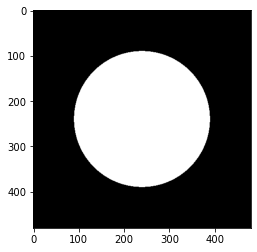

In [4]:
# creating the mask for the inner circle
# getting a checkerboard with a complete white opaque transparecy
f = TextureFactory('checkerboard',block_width=block_width, image_width=image_width,luminance_values= [0, 0, 0, 1, 1])
mask = f.get_image(1, 0, bg_luminance=0.0)

print('array size', mask.shape)
plt.figure()
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)

# saving in case we need it in another notebook 
mask_im = Image.fromarray(mask*255).convert('L')
mask_im.save('mask.png')

np.unique(mask) # should be only 0 and 1 as the mask is binary

In [5]:
# open an image with a transparency
im = Image.open('im_0.0.png').convert('L')

# convert to numpy array
im = np.array(im)


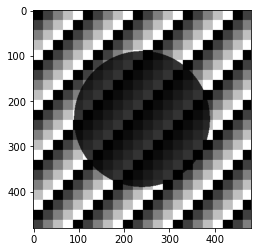

In [6]:
plt.imshow(im, cmap='gray')

In [7]:
# now we apply the mask to the numpy array
center = im[mask==1.0]

# center vector has only the values in the transparent region. We now
# get the unique values in it
transp_values = np.unique(center)/255
print('values transparency', transp_values.round(2))

# and we do the same for the surround - region without transparency
surr = im[mask==0.0]

surr_values = np.unique(surr)/255
print('surr values', surr_values.round(2))

values transparency [0.   0.05 0.1  0.15 0.2 ]
surr values [0.   0.25 0.5  0.75 1.  ]


In [8]:
# now we can use these values to calculate a contrast metric, for example
# the Space-averaged logarithm of Michelson contrast as in the paper Aguilar & Maertens (2022)

# Michelson contrast
def michelson_contrast(a, b):
    return abs(a-b)/(a+b)


# we iterate through all pairs of values in transparency
n = len(transp_values)

contrast_transp = []

# contrast between all possible non-identical pairs
for i in range(n):
    for j in range(i+1, n):
        c = michelson_contrast(transp_values [i], transp_values[j])
        contrast_transp.append(c)
    
contrast_transp  = np.array(contrast_transp)
print(contrast_transp.round(2))   

# we now calculate the log and sum

samlg_trasp = np.mean(np.log(contrast_transp))
print('SAMLG in transparency region: ', samlg_trasp.round(3))


[1.   1.   1.   1.   0.35 0.52 0.62 0.21 0.34 0.15]
SAMLG in transparency region:  -0.675
